In [40]:
#install.packages('BiocManager')
#install.packages('pheatmap')
#install.packages('RColorBrewer')
#install.packages('tidyverse')
#install.packages("devtools") #Also need to install RTools4.0
#install.packages("RColorBrewer")

#library(devtools)
#install_github("cran/lasso2") #Removed from cran

#BiocManager::install("tximportData")
#BiocManager::install("tximport")
#BiocManager::install("DESeq2")
#BiocManager::install("DEGreport")
#BiocManager::install("clusterProfiler")

package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\edwardbird\AppData\Local\Temp\RtmpeqRMGd\downloaded_packages


In [41]:
library(tximportData)
library(tximport)
library(DESeq2)
library(tidyverse)
library(DEGreport)
library(pheatmap)
library(RColorBrewer)

In [7]:
samples <- read.table(file = "metadata_numerictime.tsv.txt", header = TRUE)
samples <- as.data.frame(unclass(samples),stringsAsFactors=TRUE)
samples$Time <- as.factor(samples$Time)
samples$Trt_Time <- paste(samples$Treatment, samples$Time, sep="_")
samples$Trt_Time <- as.factor(samples$Trt_Time)
samples

SampleName,Treatment,Time,Trt_Time
<fct>,<fct>,<fct>,<fct>
C_1_A,Uninfected,1,Uninfected_1
C_1_B,Uninfected,1,Uninfected_1
C_1_C,Uninfected,1,Uninfected_1
C_1_D,Uninfected,1,Uninfected_1
C_1_E,Uninfected,1,Uninfected_1
C_1_F,Uninfected,1,Uninfected_1
C_8_A,Uninfected,8,Uninfected_8
C_8_B,Uninfected,8,Uninfected_8
C_8_C,Uninfected,8,Uninfected_8


In [24]:
meta = as.data.frame.matrix(samples)
meta

,SampleName,Treatment,Time,Trt_Time
,<chr>,<chr>,<chr>,<chr>
1,C_1_A,Uninfected,1,Uninfected_1
2,C_1_B,Uninfected,1,Uninfected_1
3,C_1_C,Uninfected,1,Uninfected_1
4,C_1_D,Uninfected,1,Uninfected_1
5,C_1_E,Uninfected,1,Uninfected_1
6,C_1_F,Uninfected,1,Uninfected_1
7,C_8_A,Uninfected,8,Uninfected_8
8,C_8_B,Uninfected,8,Uninfected_8
9,C_8_C,Uninfected,8,Uninfected_8


In [8]:
txdb <- read.table(file = "gene_2_tx.tsv", header = TRUE)
tx2gene <- txdb

In [9]:
files <- file.path("salmon_quant", "salmon", samples$SampleName, "quant.sf")
names(files) <- samples$SampleName
txi.salmon <- tximport(files, type = "salmon", tx2gene = tx2gene)
head(txi.salmon$counts)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 


summarizing abundance

summarizing counts

summarizing length



,C_1_A,C_1_B,C_1_C,C_1_D,C_1_E,C_1_F,C_8_A,C_8_B,C_8_C,C_8_D,...,V_24_C,V_24_D,V_24_E,V_24_F,V_96_A,V_96_B,V_96_C,V_96_D,V_96_E,V_96_F
TRINITY_DN0_c0_g1,4490.708,3898.111,6816.250,5244.265,5658.865,4545.606,5102.081,5131.738,5683.426,5264.201,...,6451.364,5375.294,6658.806,5705.084,3785.423,3262.685,3030.182,3394.920,3033.362,2928.931
TRINITY_DN0_c0_g2,4.000,6.000,17.000,8.000,10.000,6.000,8.000,22.000,12.000,11.000,...,6.000,11.000,12.000,6.000,3.000,6.000,3.000,4.000,8.000,4.000
TRINITY_DN0_c0_g3,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000
TRINITY_DN0_c1_g1,73.250,64.943,152.050,124.758,127.939,93.405,453.622,373.047,509.331,431.117,...,219.163,183.695,250.006,195.472,394.395,306.893,265.258,344.766,249.255,263.474
TRINITY_DN0_c10_g1,1388.850,1023.287,1871.033,1460.069,1574.582,1358.728,1479.769,1413.415,1599.582,1450.988,...,1699.625,1406.224,1852.171,1526.316,1613.952,1437.908,1305.970,1533.899,1257.485,1239.962
TRINITY_DN0_c11_g1,5.311,4.000,5.000,2.000,5.000,6.000,6.000,6.000,8.170,11.000,...,9.000,4.000,9.000,4.002,7.000,3.000,4.098,4.000,5.000,6.000


In [55]:
dds <- DESeqDataSetFromTximport(txi.salmon,
                                   colData = samples,
                                   design = ~ Treatment + Time)

using counts and average transcript lengths from tximport



In [56]:
dds

class: DESeqDataSet 
dim: 48247 48 
metadata(1): version
assays(2): counts avgTxLength
rownames(48247): TRINITY_DN0_c0_g1 TRINITY_DN0_c0_g2 ...
  TRINITY_DN9999_c0_g1 TRINITY_DN9999_c1_g1
rowData names(0):
colnames(48): C_1_A C_1_B ... V_96_E V_96_F
colData names(4): SampleName Treatment Time Trt_Time

In [57]:
smallestGroupSize <- 3
keep <- rowSums(counts(dds) >= 10) >= smallestGroupSize
dds <- dds[keep,]

In [58]:
dds$condition <- relevel(dds$Treatment, ref = "Uninfected")

In [59]:
dds <- DESeq(dds, test="LRT", reduced = ~ Time)
res_LRT <- results(dds)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [60]:
res_LRT

log2 fold change (MLE): Time 96 vs 1 
LRT p-value: '~ Treatment + Time' vs '~ Time' 
DataFrame with 17779 rows and 6 columns
                       baseMean log2FoldChange     lfcSE        stat
                      <numeric>      <numeric> <numeric>   <numeric>
TRINITY_DN0_c0_g1    4898.71210      -0.433740 0.0274586  4.68775865
TRINITY_DN0_c0_g2       9.29955      -0.524085 0.2605267  0.00339354
TRINITY_DN0_c1_g1     259.54213       1.932209 0.0668125 13.77454347
TRINITY_DN0_c10_g1   1446.01769       0.225846 0.0248291 14.77996670
TRINITY_DN0_c11_g1      6.57610       0.101634 0.2900479  0.00365167
...                         ...            ...       ...         ...
TRINITY_DN9993_c0_g2   77.24867       0.753051  0.130352  0.00343556
TRINITY_DN9994_c3_g1   43.07138       0.142159  0.141260  0.00351279
TRINITY_DN9995_c0_g1    7.21916       1.522523  0.307472  0.00349240
TRINITY_DN9999_c0_g1   37.65572      -0.739475  0.150070  0.27333190
TRINITY_DN9999_c1_g1    9.67026       0.839482 

In [62]:
# Subset the LRT results to return genes with padj < 0.05
sig_res_LRT <- res_LRT %>%
               data.frame() %>%
               rownames_to_column(var="gene") %>% 
               as_tibble() %>% 
               filter(padj < 0.05)
 
# Get sig gene lists
sigLRT_genes <- sig_res_LRT %>% 
                pull(gene)
                
length(sigLRT_genes)

[1] 1330

rlog() may take a few minutes with 30 or more samples,
vst() is a much faster transformation



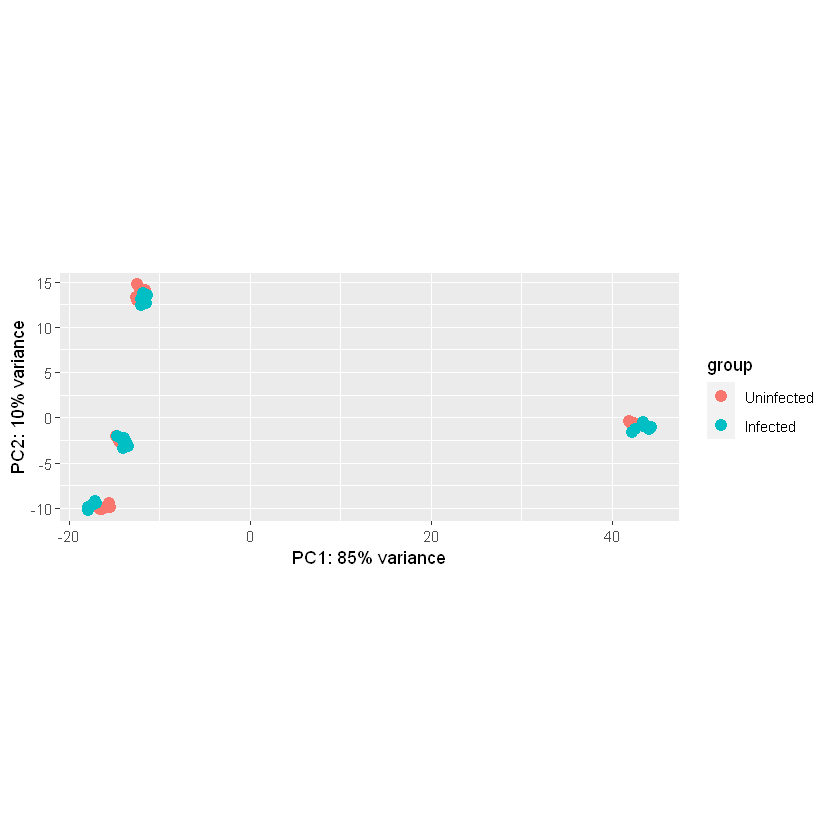

In [63]:
 # Transform counts for data visualization
 rld <- rlog(dds, blind=TRUE)
	
 # Plot PCA 
 plotPCA(rld, intgroup="condition")
	
 # Extract the rlog matrix from the object and compute pairwise correlation values
 rld_mat <- assay(rld)
 rld_cor <- cor(rld_mat)

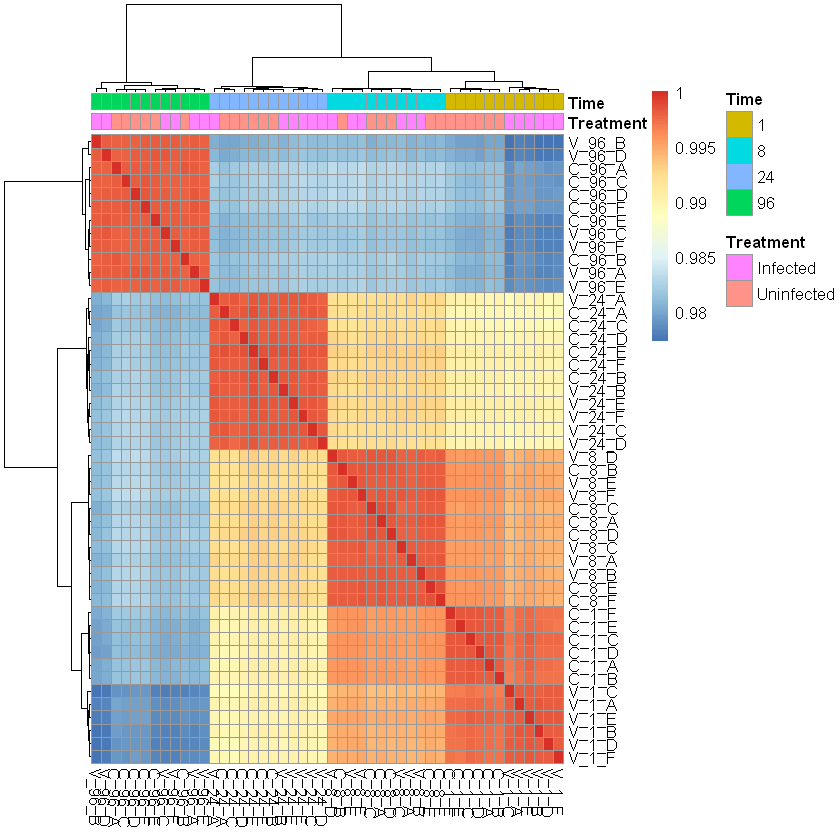

In [64]:
 # Plot heatmap
df <- as.data.frame(colData(dds)[,c("Treatment","Time")])
pheatmap(rld_cor, annotation_col=df)

In [65]:
# Obtain rlog values for those significant genes
cluster_rlog <- rld_mat[sig_res_LRT$gene, ]

Working with 1330 genes.

Working with 1330 genes after filtering: minc > 15

Joining with `by = join_by(merge)`
Joining with `by = join_by(merge)`


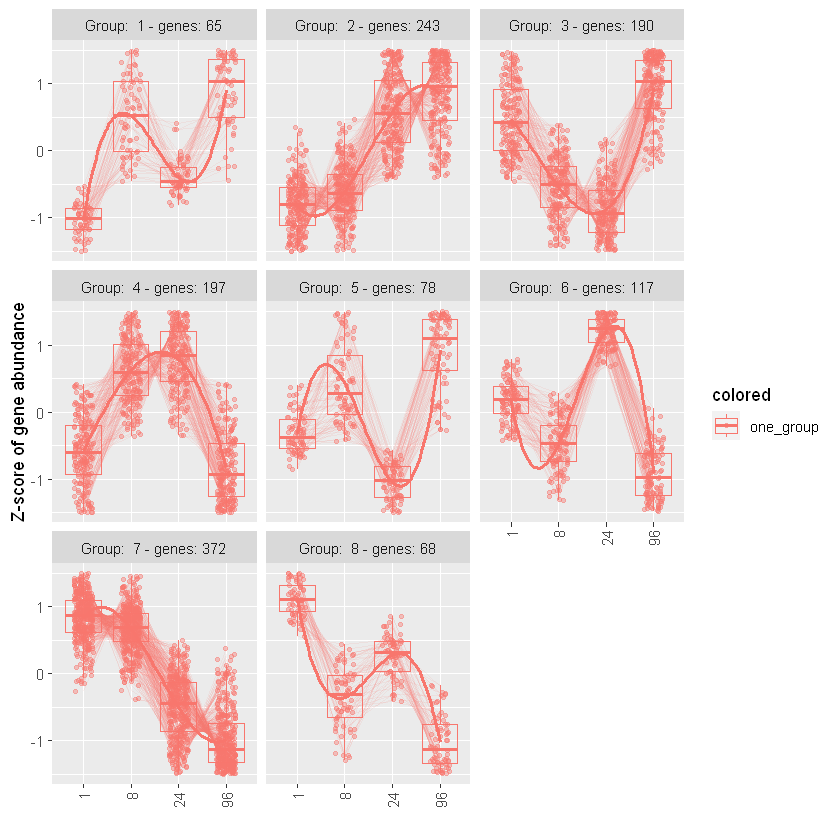

In [66]:
# Use the `degPatterns` function from the 'DEGreport' package to show gene clusters across sample groups
clusters <- degPatterns(cluster_rlog, metadata = df, time = "Time", col=NULL)